In [83]:
import sys
import os
sys.path.append('/home/yutanagano/Projects/tcr_embedder')
os.chdir('/home/yutanagano/Projects/tcr_embedder')

In [84]:
import json
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import seaborn

seaborn.set_theme()
seaborn.set_style('white')

In [85]:
BENCHMARKING_PARENT_DIR = Path('benchmarks')

In [86]:
metric_dicts = []

for model in BENCHMARKING_PARENT_DIR.iterdir():
    with open(model/'metrics.json', 'r') as f:
        metric_dicts.append(json.load(f))

In [87]:
metrics = pd.DataFrame(metric_dicts)
metrics = metrics.sort_values(by='model_name', ignore_index=True)

In [88]:
metrics

,model_name,alignment,uniformity,5nn_accuracy
0,CDR3BERT_c_6_128_8_512-embed_1,0.279206,-0.562456,0.577566
1,CDR3BERT_c_6_128_8_512-embed_2,0.468185,-0.941718,0.587112
2,CDR3BERT_c_6_128_8_512-embed_3,0.608558,-1.240888,0.577566
3,CDR3BERT_c_6_128_8_512-embed_4,0.575846,-1.204664,0.556086
4,CDR3BERT_c_6_128_8_512-embed_5,0.393466,-0.857006,0.572792
5,CDR3BERT_c_6_128_8_512-embed_6,0.441150,-0.894224,0.608592
6,atchley_embedder,0.880457,-1.691871,0.704057
7,random_embedder_0,0.717799,-1.599363,0.739857
8,random_embedder_1,0.855507,-2.048513,0.773270
9,random_embedder_2,0.371018,-1.016268,0.749403


In [89]:

def collapse_names(name):
    groups = ('random_embedder', 'CDR3BERT_c')

    for group in groups:
        if group in name:
            return group
    
    return name

metrics['model_name'] = metrics['model_name'].map(collapse_names)

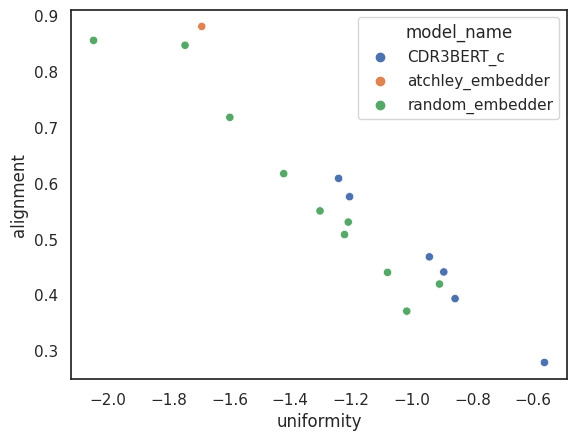

In [90]:
scatter_model_names = seaborn.scatterplot(metrics, x='uniformity', y='alignment', hue='model_name')
plt.show()

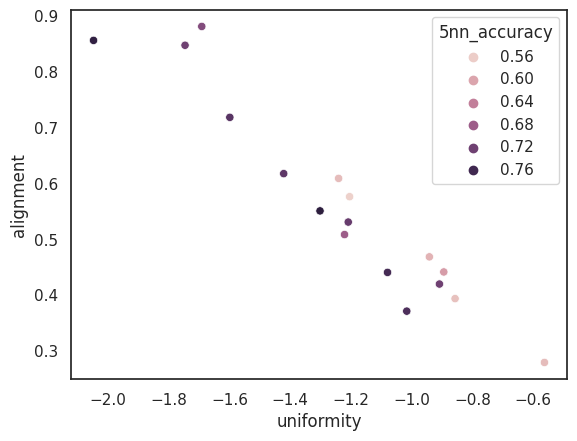

In [91]:
scatter_5nn_accs = seaborn.scatterplot(metrics, x='uniformity', y='alignment', hue='5nn_accuracy')
plt.show()